In [1]:
import keras
import tensorflow as tf
import sys
import os
print('TensorFlow version:', tf.__version__)
print('Keras version:', keras.__version__)

/home/user/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


TensorFlow version: 1.10.1
Keras version: 2.2.2


In [2]:
working_dir = os.getcwd()
print("Working directory is:",working_dir)
sys.path.append(working_dir)  # To find local version of the library

Working directory is: /home/user/Source/Evrim/Turkishplate


In [3]:
ROOT_DIR = os.path.join("/home/user/Source/Evrim/Turkishplate") #linux
#ROOT_DIR = os.path.join("C:/Users/is95217/source/plate/turkishplate") #win
sys.path.append(ROOT_DIR + "/Python")
import PPlate as p

In [5]:
DATA_DIR = "/home/user/Source/data/dataEvrim/Original_15Kcrop_distributed"  #linux
#DATA_DIR = "C:/Users/is95217/data/Original_15Kcrop_distributed" #win
print("Data:", DATA_DIR)
print("Source code:", ROOT_DIR)

Data: /home/user/Source/data/dataEvrim/Original_15Kcrop_distributed
Source code: /home/user/Source/Evrim/Turkishplate


# Model description and training

In [14]:
#                imgw,imgh,path,load, path & name_model, epoch_cnt
model = p.train(128,64,DATA_DIR,False, ROOT_DIR + "/Model/model15k_2", 25)  

hata!  1#34UH58#02042018#174816.jpgnolu plakanın etiketi6uzunlukta!
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
the_input (InputLayer)          (None, 128, 64, 1)   0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 128, 64, 16)  160         the_input[0][0]                  
__________________________________________________________________________________________________
max1 (MaxPooling2D)             (None, 64, 32, 16)   0           conv1[0][0]                      
__________________________________________________________________________________________________
conv2 (Conv2D)                  (None, 64, 32, 16)   2320        max1[0][0]                       
_________________________________________

In [15]:
model.history.history

{'acc': [0.8812649581172717,
  0.9733920023932988,
  0.9681441962504986,
  0.955282708416434,
  0.9366548663741524,
  0.9086383127243718,
  0.8593263861188671,
  0.7758052453131232,
  0.7081820901475867,
  0.6236263462305545,
  0.6056068009573196,
  0.6140082768248903,
  0.570118667730355,
  0.5135296170721978,
  0.5448718587953729,
  0.5391204627044276,
  0.5585784802552852,
  0.5401525727961707,
  0.5454327881930594,
  0.5170921420023933,
  0.46425757877941765,
  0.40123404467491025,
  0.2385520542481053,
  0.2978036497806143,
  0.3725593338651775],
 'loss': [0.84973188077849,
  0.0751476930520893,
  0.09371272681845541,
  0.14352429481189094,
  0.2199828252704114,
  0.33820668620520467,
  0.5404810008205998,
  0.8624352901876805,
  1.1006102191805127,
  1.5403016232492013,
  1.5998660784724417,
  1.437470262083082,
  1.698901137400539,
  2.117683116991205,
  1.8481634342128364,
  1.9648689778572923,
  1.8407890781980136,
  2.0749172912860803,
  2.019119394456765,
  2.070988071625766

In [ ]:
"""3 epoch

'acc': [0.7746100295220617, 0.9343433335992979, 0.9225594430702945],
 'loss': [1.6463822224895437, 0.19220429505605727, 0.2466574061728113],
 'val_acc': [0.7543075941289088, 0.7198468410976387, 0.7287611678366305],
 'val_loss': [2.3784760587064797, 2.8456657012709403, 2.8842970789353712]}
 """

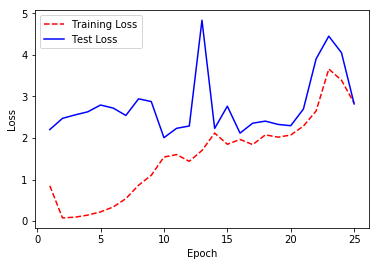

In [16]:
import matplotlib.pyplot as plt
# Get training and test loss histories
training_loss = model.history.history['loss']
test_loss = model.history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();


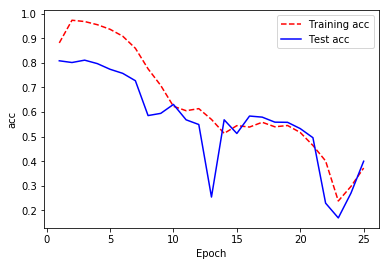

In [17]:
training_acc = model.history.history['acc']
test_acc = model.history.history['val_acc']
# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_acc, 'r--')
plt.plot(epoch_count, test_acc, 'b-')
plt.legend(['Training acc', 'Test acc'])
plt.xlabel('Epoch')
plt.ylabel('acc')
plt.show();

# Test on validation images

In [18]:
cnt_test = len(os.listdir(DATA_DIR + '/test'))

In [20]:
tiger_test = p.TextImageGenerator(DATA_DIR, 'test', 128, 64, cnt_test, 4)
tiger_test.build_data()

net_inp = model.get_layer(name='the_input').input
net_out = model.get_layer(name='softmax').output

In [21]:
for inp_value, _ in tiger_test.next_batch():
    matched=0
    bs = inp_value['the_input'].shape[0]
    X_data = inp_value['the_input']
    
    net_out_value = sess.run(net_out, feed_dict={net_inp:X_data})
    pred_texts = decode_batch(net_out_value)
    
    labels = inp_value['the_labels']
    texts = []
    #print("labels:",labels)
    
    for label in labels:
        text = labels_to_text(label) 
        #print("text:",text)
        #text = ''.join(list(map(lambda x: letters[int(x)], label)))
        texts.append(text)
        #print("texts:",texts)
    
    for i in range(bs):
        #print('Predicted: %s True: %s i: %s lpred: %s ltrue: %s' % 
        #      (pred_texts[i], texts[i],str(i),len(pred_texts[i]),len(texts[i])))
        
        if pred_texts[i] == texts[i]:
            matched = matched+1
        else:
            print('wrong Predicted: %s True: %s i: %s lpred: %s ltrue: %s' % 
              (pred_texts[i], texts[i],str(i),len(pred_texts[i]),len(texts[i])))
            
    print("matched=",matched, ",total=",i, "TP: %", round(matched/i, 2) *100)
    break

NameError: name 'sess' is not defined